# Supplementary Appendix
## Empirical Analysis of Alternative College Admissions System in Russia

### Exploratory analysis

In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statistics import variance

In [5]:
sch16 = pd.read_csv("C:/Users/Оксана/Documents/mech/rm/sch16.csv")
sch16 = sch16.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
sch17 = pd.read_csv("C:/Users/Оксана/Documents/mech/rm/sch17.csv")
sch17 = sch17.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
data = pd.read_csv("C:/Users/Оксана/Desktop/диплом/agg.csv", encoding = 'cp1251')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data= data.drop(columns = ['Unnamed: 0'])

In [9]:
cities = pd.read_excel("C:/Users/Оксана/Desktop/диплом/cities.xlsx")

In [10]:
uni_data = pd.read_csv("C:/Users/Оксана/Desktop/диплом/restored+pop.csv")
uni_data = uni_data.merge(cities[["city", "reg_id"]], on = "city", how = "left")
uni_data["reg_id"] = uni_data["reg_id"].fillna(105)
uni_data["reg_id"] = uni_data["reg_id"].astype("int")

In [11]:
data = data.rename(columns={"вуз": "uni", "УГН": "fac", "ЕГЭ": "score", "направление" : "edp", "основание" : "aro", "место" : "seat"})
data = data.dropna(subset = ['fac_id'])
data = data.dropna(subset = ['score'])
data = data.merge(uni_data[['uni', 'uni_id','forbes', 'raex']], on = "uni", how = "left")
data = data.dropna(subset = ['uni_id'])

In [12]:
sch16 = sch16.rename(columns = {'вуз' : 'uni', 'УГН':'fac', 'ЕГЭ' : 'score', 'направление' : 'edp', 'место': 'seat', 'основание': 'aro'})[['uni', 'fac', 'score', 'year', 'edp', 'seat', 'aro']]
sch17 = sch17.rename(columns = {'вуз' : 'uni', 'УГН':'fac', 'ЕГЭ' : 'score', 'направление' : 'edp', 'место': 'seat', 'основание': 'aro'})[['uni', 'fac', 'score', 'year', 'edp', 'seat', 'aro']]

In [13]:
sch16 = sch16.merge(uni_data[['uni', 'uni_id', 'forbes', 'raex']], on = 'uni')
sch17 = sch17.merge(uni_data[['uni', 'uni_id', 'forbes', 'raex']], on = 'uni')

In [14]:
data = data.drop('fac_id', axis = 1)
data = pd.concat([data, sch16, sch17])

Elite colleges - SFC seats

In [23]:
a1 = np.array(data.loc[(data['year'] == 2016) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
b1 = np.array(data.loc[(data['year'] == 2017) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
c1 = np.array(data.loc[(data['year'] == 2018) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
d1 = np.array(data.loc[(data['year'] == 2019) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
e1 = np.array(data.loc[(data['year'] == 2021) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])

TB seats

In [24]:
aa1 = np.array(data.loc[(data['year'] == 2016) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
bb1 = np.array(data.loc[(data['year'] == 2017) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
cc1 = np.array(data.loc[(data['year'] == 2018) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
dd1 = np.array(data.loc[(data['year'] == 2019) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
ee1 = np.array(data.loc[(data['year'] == 2021) & (data['score'] > 0) & (data['forbes'] == 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])

Ordinary colleges - SFC seats

In [25]:
a2 = np.array(data.loc[(data['year'] == 2016) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
b2 = np.array(data.loc[(data['year'] == 2017) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
c2 = np.array(data.loc[(data['year'] == 2018) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
d2 = np.array(data.loc[(data['year'] == 2019) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])
e2 = np.array(data.loc[(data['year'] == 2021) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'бюджетное') & (data['aro'] == 'по конкурсу')]['score'])

TB seats

In [26]:
aa2 = np.array(data.loc[(data['year'] == 2016) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
bb2 = np.array(data.loc[(data['year'] == 2017) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
cc2 = np.array(data.loc[(data['year'] == 2018) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
dd2 = np.array(data.loc[(data['year'] == 2019) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])
ee2 = np.array(data.loc[(data['year'] == 2021) & (data['score'] > 0) & (data['forbes'] != 2) & (data['seat'] == 'с полным возмещением затрат') & (data['aro'] == 'по конкурсу')]['score'])

Frequency distributions:

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

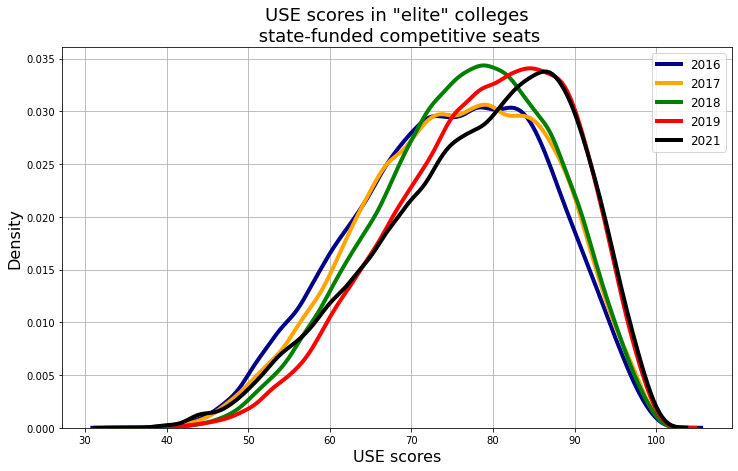

In [27]:
fig, ax = plt.subplots(figsize = (12,7))


pl = sns.distplot(a1, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(b1, hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(c1, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(d1, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(e1, hist=False, kde=True, 
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
pl.set_xlabel('USE scores', fontsize = 16)
pl.set_ylabel('Density', fontsize = 16)
pl.set_title('USE scores in "elite" colleges\n state-funded competitive seats', fontsize = 18)
pl.legend(labels = ['2016', '2017', '2018', '2019', '2021'], fontsize = 'large')
plt.grid(True) 

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

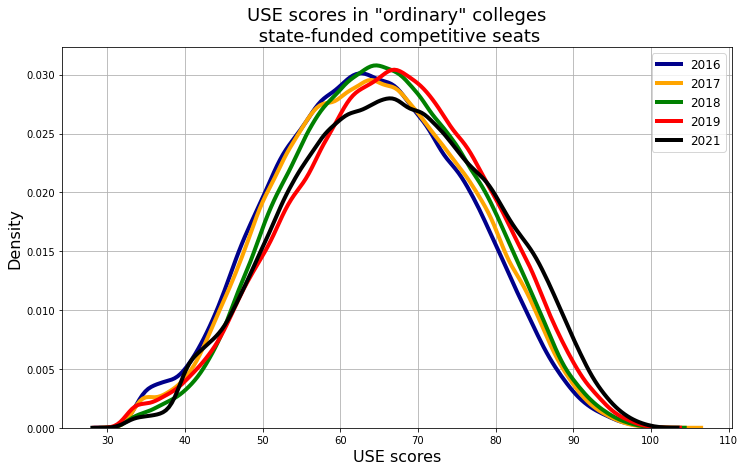

In [28]:
fig, ax = plt.subplots(figsize = (12,7))


pl = sns.distplot(a2, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(b2, hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(c2, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(d2, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(e2, hist=False, kde=True, 
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
pl.set_xlabel('USE scores', fontsize = 16)
pl.set_ylabel('Density', fontsize = 16)
pl.set_title('USE scores in "ordinary" colleges\n state-funded competitive seats', fontsize = 18)
pl.legend(labels = ['2016', '2017', '2018', '2019', '2021'], fontsize = 'large')
plt.grid(True) 

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

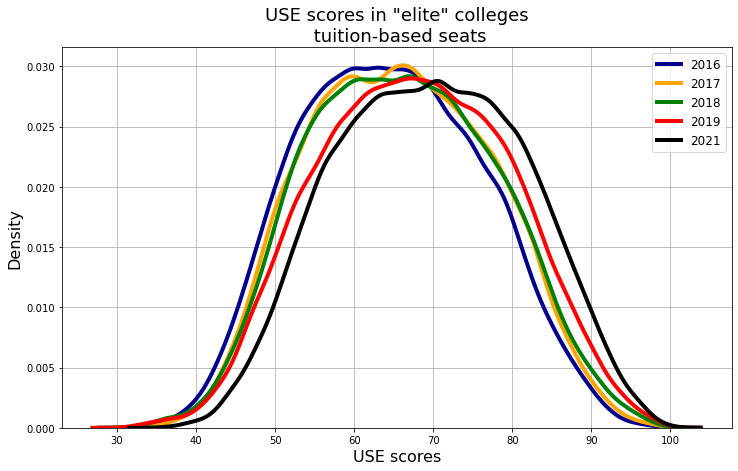

In [29]:
fig, ax = plt.subplots(figsize = (12,7))


pl = sns.distplot(aa1, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(bb1, hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(cc1, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(dd1, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(ee1, hist=False, kde=True, 
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
pl.set_xlabel('USE scores', fontsize = 16)
pl.set_ylabel('Density', fontsize = 16)
pl.set_title('USE scores in "elite" colleges\n tuition-based seats', fontsize = 18)
pl.legend(labels = ['2016', '2017', '2018', '2019', '2021'], fontsize = 'large')
plt.grid(True) 

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

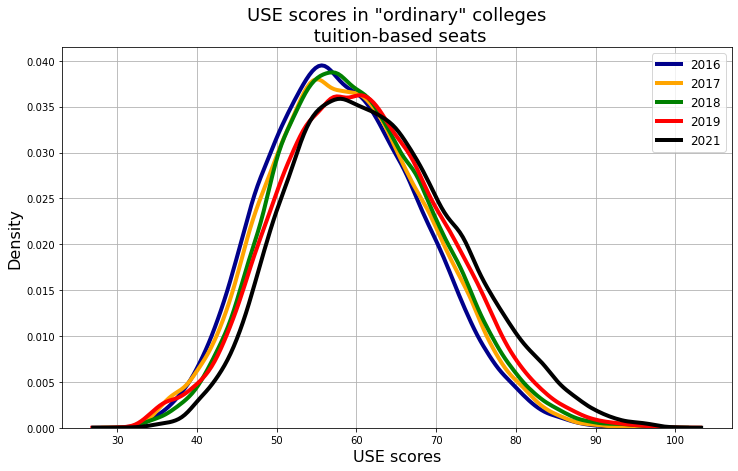

In [30]:
fig, ax = plt.subplots(figsize = (12,7))


pl = sns.distplot(aa2, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(bb2, hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(cc2, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(dd2, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
sns.distplot(ee2, hist=False, kde=True, 
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                 ax = ax)
pl.set_xlabel('USE scores', fontsize = 16)
pl.set_ylabel('Density', fontsize = 16)
pl.set_title('USE scores in "ordinary" colleges\n tuition-based seats', fontsize = 18)
pl.legend(labels = ['2016', '2017', '2018', '2019', '2021'], fontsize = 'large')
plt.grid(True) 

#### Scatter plots:

Average scores

In [33]:
means = data.loc[(data['year'].isin([2018, 2019, 2021])) & (data['seat'] == 'бюджетное') & (data['score'] > 0)].groupby(['year', 'uni_id'])['score'].agg(['mean', 'min'])
means = pd.DataFrame(means).reset_index()
means = means.loc[means['year'] == 2019].rename(columns = {'mean' : 'mean19', 'min' : 'min19'}).drop(columns = ['year']).merge(means.loc[means['year'] == 2018].rename(columns = {'mean' : 'mean18', 'min' : 'min18'}).drop(columns = ['year']), on = "uni_id").merge(means.loc[means['year'] == 2021].rename(columns = {'mean' : 'mean21', 'min' : 'min21'}).drop(columns = ['year']))
means['diff19'] = means['mean19'] - means['mean18']
means['diff21'] = means['mean21'] - means['mean19']
means = means.merge(uni_data[['uni_id', 'uni', 'forbes']], on = "uni_id")
means['color'] = np.array(['black']*len(means))
means.loc[means['forbes'] == 2, 'color'] = 'red'

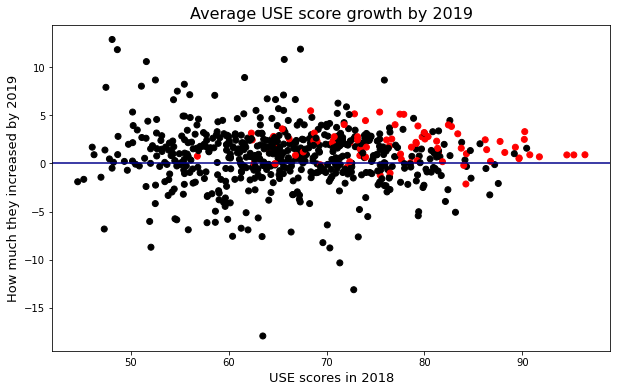

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(means['mean18'], means['diff19'], c = means['color'])
plt.grid(False)
plt.title('Average USE score growth by 2019', fontsize=16)
plt.xlabel('USE scores in 2018', fontsize=13)
plt.ylabel('How much they increased by 2019', fontsize=13)
plt.axhline(y=0, color='darkblue', linestyle='-')
# plt.savefig('avgscores19.png')

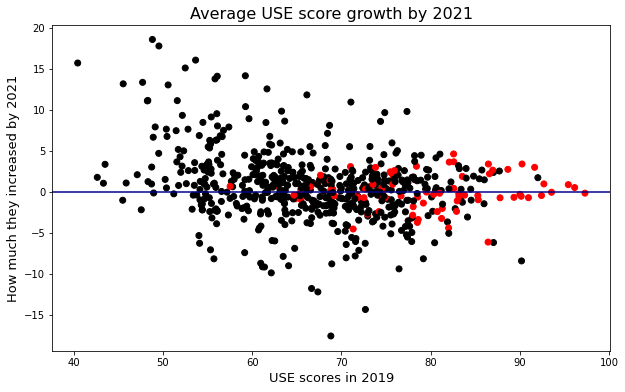

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(means['mean19'], means['diff21'], c = means['color'])
plt.grid(False)
plt.title('Average USE score growth by 2021', fontsize=16)
plt.xlabel('USE scores in 2019', fontsize=13)
plt.ylabel('How much they increased by 2021', fontsize=13)
plt.axhline(y=0, color='darkblue', linestyle='-')

# plt.savefig('avgscores21.png')

Score gaps

In [36]:
pay = data.loc[(data['year'].isin([2018, 2019, 2021])) & (data['score'] > 0)].groupby(['year', 'uni_id', 'seat'])['score'].agg(['mean', 'min'])
pay = pay.reset_index()
pay = pay.loc[(pay['year'] == 2019) & (pay['seat'] == "бюджетное")].rename(columns = {'mean' : 'mean19_b', 'min' : 'min19_b'}).drop(columns = ['year', 'seat']).merge(pay.loc[(pay['year'] == 2019) & (pay['seat'] != "бюджетное")].rename(columns = {'mean' : 'mean19_p', 'min' : 'min19_p'}).drop(columns = ['year', 'seat'])).merge(pay.loc[(pay['year'] == 2018) & (pay['seat'] == "бюджетное")].rename(columns = {'mean' : 'mean18_b', 'min' : 'min18_b'}).drop(columns = ['year', 'seat']).merge(pay.loc[(pay['year'] == 2018) & (pay['seat'] != "бюджетное")].rename(columns = {'mean' : 'mean18_p', 'min' : 'min18_p'}).drop(columns = ['year', 'seat']))).merge(pay.loc[(pay['year'] == 2021) & (pay['seat'] == "бюджетное")].rename(columns = {'mean' : 'mean21_b', 'min' : 'min21_b'}).drop(columns = ['year', 'seat']).merge(pay.loc[(pay['year'] == 2021) & (pay['seat'] != "бюджетное")].rename(columns = {'mean' : 'mean21_p', 'min' : 'min21_p'}).drop(columns = ['year', 'seat'])))
pay['gap19'] = pay['mean19_b'] - pay['mean19_p']
pay['gap18'] = pay['mean18_b'] - pay['mean18_p']
pay['gap21'] = pay['mean21_b'] - pay['mean21_p']
pay = pay.merge(uni_data[['uni_id', 'uni', 'forbes']], on = "uni_id")
pay['color'] = np.array(['black']*len(pay))
pay.loc[pay['forbes'] == 2, 'color'] = 'red'
pay['diff_gap19'] = pay['gap19'] - pay['gap18']
pay['diff_gap21'] = pay['gap21'] - pay['gap19']

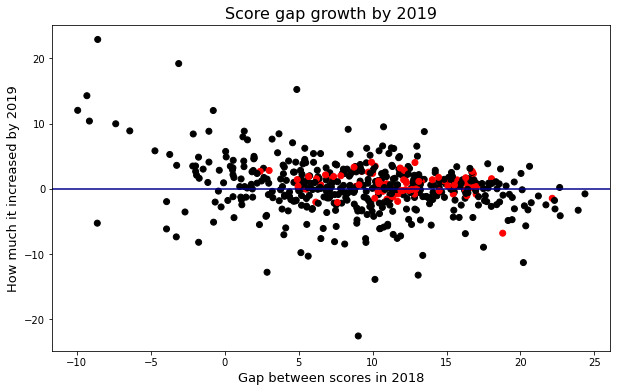

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(pay['gap18'], pay['diff_gap19'], c = pay['color'])
plt.grid(False)
plt.title('Score gap growth by 2019', fontsize=16)
plt.xlabel('Gap between scores in 2018', fontsize=13)
plt.ylabel('How much it increased by 2019', fontsize=13)
plt.axhline(y=0, color='darkblue', linestyle='-')
# plt.savefig('gap19.png')

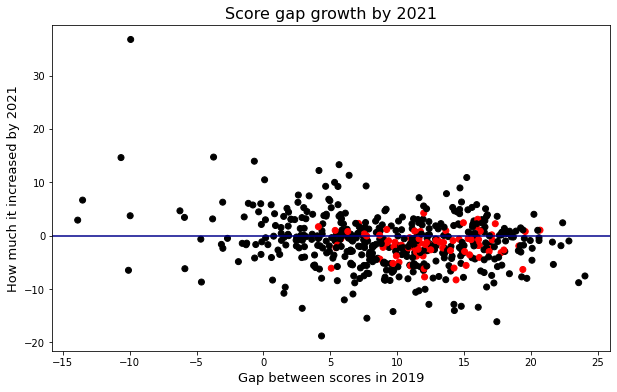

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(pay['gap19'], pay['diff_gap21'], c = pay['color'])
plt.grid(False)
plt.title('Score gap growth by 2021', fontsize=16)
plt.xlabel('Gap between scores in 2019', fontsize=13)
plt.ylabel('How much it increased by 2021', fontsize=13)
plt.axhline(y=0, color='darkblue', linestyle='-')
# plt.savefig('gap21.png')

## Blocking students

In [ ]:
dist = pd.read_excel("C:/Users/Оксана/Desktop/диплом/distances.xlsx")
dist = dist.drop(columns = ['Unnamed: 0'])

In [ ]:
# normalizing distances
def normalize(x):
    return (x - x.min())/(x.max() - x.min())
dist = dist.apply(normalize)

In [ ]:
data = data.loc[(data['aro'] == 'по конкурсу') & (data['seat'] == 'бюджетное')]

### Counting blocking students:

Source: Dmitry Ivanov, Junior Research Fellow, International Laboratory of Game Theory and Decision Making

In [40]:
def get_n_blocking_pairs(st_pref, sc_pref, matching, verbose=False):
    """
    :param st_pref: np array (n_students, n_schools) with cardinal/ordinal student preferences over schools
    :param sc_pref:  np array (n_students, n_schools) with cardinal/ordinal school preferences over students
    :param matching: np array (n_students, n_schools) with 0 and 1 representing unmatched and matched pairs
    :param verbose: bool, whether to print intermediate computations
    :return: number of students that form blocking pairs with at least one school
    note: utility of student not being matched anywhere (or school not being assigned anyone) is assumed to equal 0
    """
    st_matching = st_pref * matching
    st_matching = np.where(st_matching > 0, st_matching, np.inf).min(1, keepdims=True)
    st_matching = np.where(~np.isinf(st_matching), st_matching, 0)  # minimal preference over matched schools
    if verbose: print('\nst_matching\n', st_matching)

    sc_matching = sc_pref * matching
    sc_matching = np.where(sc_matching > 0, sc_matching, np.inf).min(0, keepdims=True)
    sc_matching = np.where(~np.isinf(sc_matching), sc_matching, 0)  # minimal preference over matched students
    if verbose: print('\nsc_matching\n', sc_matching)

    st_better = st_pref > st_matching  # which schools are better than matched
    if verbose: print('\nst_better\n', st_better)

    sc_better = sc_pref > sc_matching  # which students are better than matched
    if verbose: print('\nsc_better\n', sc_better)

    blocking_pairs = st_better * sc_better
    if verbose: print('\nblocking_pairs\n', blocking_pairs)

    return (blocking_pairs.sum(1) > 0).sum()

Weighted preferences

In [ ]:
# убираем нежелательные факи из списка
nottodo = ['fac63', 'fac65', 'fac64', 'fac66', 'fac67']
todo = data['fac_id'].unique()
todo = list(set(todo) - set(nottodo))
facs_done = []
s_blocking_pairs = 0
for f_id in todo:
    # preferences here
    df = data.loc[(data['fac_id'] == f_id) & (data['year'] == 2019)]
    
    
    mean_scores = pd.DataFrame(df.dropna(subset = ['score']).groupby('uni_id')['score'].agg(['mean', 'min']))
    mean_scores = mean_scores.rename(columns = {"mean" : "mean_score", "min" : "pass_score"})
    
    df = df.merge(mean_scores, on = "uni_id", how = "left")
    
    df = df.merge(cities[['city', 'reg_id']], on = "city", how = "left")
    
    df['id'] = df['id'].astype("string")
    df['i'] = "i"
    df['id'] = df['i']+df['id']
    
    df = df.drop(columns = ['i'])
    
    df["reg_id"] = df["reg_id"].astype("int")
    
    # school capacities
    schools = df.groupby('uni_id')['uni_id'].count()
    school_capacities = {}
    for s in schools.index:
        school_capacities[s] = int(schools[s])
        
    # setting a list of real assignments of people
    real_list = df[['id', 'uni_id']].values
    real = {}
    for i in range(len(real_list)):
        real[real_list[i][0]] = real_list[i][1]    
    
        
    # student preferences
    # I need to save the number of feasible 
    student_preferences = {}
    for i in df["id"]:
        student_preferences[i] = []
    feasible = student_preferences.copy()
    for i in student_preferences.keys():
        ir = int(df.loc[df["id"] == i]["reg_id"])
        dd = pd.DataFrame(dist[ir])
        dd['reg_id'] = dd.index
        uu = uni_data[['uni_id', 'reg_id']].loc[uni_data["uni_id"].isin(school_capacities.keys())]
        uu = uu.merge(dd, on = "reg_id", how = "left").merge(mean_scores, on = "uni_id")
        uu['feasible'] = (uu['pass_score'] <=float(df["score"].loc[df["id"] == i]))
        # normalize mean_score as basic utility
        uu['mean_score'] = (uu['mean_score'] - uu['mean_score'].min())/(uu['mean_score'].max() - uu['mean_score'].min())
        # add final assignment
        uu['assignment'] = np.zeros(len(uu))
        uu.loc[uu['uni_id'] == real[i], 'assignment'] = uu['mean_score']
        # calculate weighted sum
        uu['u'] = -0.33*uu[ir] + 0.33*uu['mean_score'] + 0.34*uu['assignment']
        # add info to feasible dict
        feasible[i] = uu['feasible'].sum()
        student_preferences[i] = list(pd.concat([uu.loc[uu['feasible'] == True].sort_values("u", ascending = False),uu.loc[uu['feasible'] == False].sort_values("u", ascending = False)])["uni_id"])
    
    # school preferences
    # они не совсем такие, сначала идут студенты, которые указали их у себя
    # правда у меня они всех указывают
    school_preferences = {}
    students = list(df.sort_values('score', ascending = False)["id"])
    for s in school_capacities.keys():
        school_preferences[s] = students
    
    
    schools  = list(school_capacities.keys())
    st_pref = {}
    for i in student_preferences.keys():
        st_pref[i] = student_preferences[i].copy()
        for s in range(len(schools)):
            st_pref[i][s] = list(reversed(student_preferences[i])).index(schools[s])+1
    st_pref = pd.DataFrame(st_pref)
    st_pref.index = schools
    st_pref = np.array(st_pref.T)
        
        
    students = list(student_preferences.keys())
    sc_pref = {}
    for i in school_preferences.keys():
        sc_pref[i] = school_preferences[i].copy()
        for s in range(len(students)):
            sc_pref[i][s] = list(reversed(school_preferences[i])).index(students[s])+1
        
    sc_pref = pd.DataFrame(sc_pref)
    sc_pref = np.array(sc_pref)
        
    matching = pd.DataFrame(real, index = [0]).T
    matching = pd.get_dummies(matching[0])
    matching = np.array(matching)
        
    
    
    
    # sum of blocking pairs
    # sum of blocking pairs
    s_blocking_pairs += get_n_blocking_pairs(st_pref, sc_pref, matching, verbose = False)
    
    # add fac if it is done
    facs_done += [f_id]

Locational preferences:

In [ ]:
nottodo = ['fac63', 'fac65', 'fac64', 'fac66', 'fac67']
todo = data['fac_id'].unique()
todo = list(set(todo) - set(nottodo))
facs_done = []
s_blocking_pairs = 0
for f_id in todo:
    # preferences here
    df = data.loc[(data['fac_id'] == f_id) & (data['year'] == 2019)]
    
    
    mean_scores = pd.DataFrame(df.dropna(subset = ['score']).groupby('uni_id')['score'].agg(['mean', 'min']))
    mean_scores = mean_scores.rename(columns = {"mean" : "mean_score", "min" : "pass_score"})
    
    df = df.merge(mean_scores, on = "uni_id", how = "left")
    
    df = df.merge(cities[['city', 'reg_id']], on = "city", how = "left")
    
    df['id'] = df['id'].astype("string")
    df['i'] = "i"
    df['id'] = df['i']+df['id']
    
    df = df.drop(columns = ['i'])
    
    df["reg_id"] = df["reg_id"].astype("int")
    
    # school capacities
    schools = df.groupby('uni_id')['uni_id'].count()
    school_capacities = {}
    for s in schools.index:
        school_capacities[s] = int(schools[s])
        
    # setting a list of real assignments of people
    real_list = df[['id', 'uni_id']].values
    real = {}
    for i in range(len(real_list)):
        real[real_list[i][0]] = real_list[i][1]    
    
        
    # student preferences
    # I need to save the number of feasible 
    student_preferences = {}
    for i in df["id"]:
        student_preferences[i] = []
    feasible = student_preferences.copy()
    for i in student_preferences.keys():
        ir = int(df.loc[df["id"] == i]["reg_id"])
        dd = pd.DataFrame(dist[ir])
        dd['reg_id'] = dd.index
        uu = uni_data[['uni_id', 'reg_id']].loc[uni_data["uni_id"].isin(school_capacities.keys())]
        uu = uu.merge(dd, on = "reg_id", how = "left").merge(mean_scores, on = "uni_id")
        uu['feasible'] = (uu['pass_score'] <=float(df["score"].loc[df["id"] == i]))
        # add info to feasible dict
        feasible[i] = uu['feasible'].sum()
        student_preferences[i] = list(pd.concat([uu.loc[uu['feasible'] == True].sort_values([ir, 'mean_score'], ascending = [True, False]),uu.loc[uu['feasible'] == False].sort_values([ir, 'mean_score'], ascending = [True, False])])["uni_id"])
        
    # school preferences
    # они не совсем такие, сначала идут студенты, которые указали их у себя
    # правда у меня они всех указывают
    school_preferences = {}
    students = list(df.sort_values('score', ascending = False)["id"])
    for s in school_capacities.keys():
        school_preferences[s] = students
    
    
    schools  = list(school_capacities.keys())
    st_pref = {}
    for i in student_preferences.keys():
        st_pref[i] = student_preferences[i].copy()
        for s in range(len(schools)):
            st_pref[i][s] = list(reversed(student_preferences[i])).index(schools[s])+1
    st_pref = pd.DataFrame(st_pref)
    st_pref.index = schools
    st_pref = np.array(st_pref.T)
        
        
    students = list(student_preferences.keys())
    sc_pref = {}
    for i in school_preferences.keys():
        sc_pref[i] = school_preferences[i].copy()
        for s in range(len(students)):
            sc_pref[i][s] = list(reversed(school_preferences[i])).index(students[s])+1
        
    sc_pref = pd.DataFrame(sc_pref)
    sc_pref = np.array(sc_pref)
        
    matching = pd.DataFrame(real, index = [0]).T
    matching = pd.get_dummies(matching[0])
    matching = np.array(matching)
        
    
    
    
    # sum of blocking pairs
    s_blocking_pairs += get_n_blocking_pairs(st_pref, sc_pref, matching, verbose = False)
    
    # add fac if it is done
    facs_done += [f_id]

Common preferences

In [ ]:
data19 = data.loc[data['year'] == 2019]

In [ ]:
def blocking_students(data):
    s_blocking_pairs = 0
    for f_id in data['fac_id'].unique():
        # preferences here
        df = data.loc[data['fac_id'] == f_id]
    
    
        mean_scores = pd.DataFrame(df.dropna(subset = ['score']).groupby('uni_id')['score'].agg(['mean', 'min']))
        mean_scores = mean_scores.rename(columns = {"mean" : "mean_score", "min" : "pass_score"})
    
    
        df = df.merge(mean_scores, on = "uni_id", how = "left")
        mean_scores['uni_id'] = mean_scores.index
    
        df['id'] = df['id'].astype("string")
        df['i'] = "i"
        df['id'] = df['i']+df['id']
        df = df.drop(columns = ['i'])
    
    
        # school capacities
        schools = df.groupby('uni_id')['uni_id'].count()
        school_capacities = {}
        for s in schools.index:
            school_capacities[s] = int(schools[s])
        
        # setting a list of real assignments of people
        real_list = df[['id', 'uni_id']].values
        real = {}
        for i in range(len(real_list)):
            real[real_list[i][0]] = real_list[i][1]    
    
        
        # student preferences
        # I need to save the number of feasible 
        student_preferences = {}
        for i in df["id"]:
            student_preferences[i] = []
        feasible = student_preferences.copy()
    
    
        # fill feasible
    
        for i in student_preferences.keys():
            means = mean_scores.copy()
            means['feasible'] = (means['pass_score'] <=float(df["score"].loc[df["id"] == i]))
            feasible[i] = means['feasible'].sum()
            # adjust feasible
            student_preferences[i] = list(pd.concat([means.loc[means['feasible'] == True].sort_values('mean_score', ascending = False),means.loc[means['feasible'] == False].sort_values('mean_score', ascending = False)])["uni_id"])
        
        # school preferences
        # они не совсем такие, сначала идут студенты, которые указали их у себя
        # правда у меня они всех указывают
        school_preferences = {}
        students = list(df.sort_values('score', ascending = False)["id"])
        for s in school_capacities.keys():
            school_preferences[s] = students
    
    
        schools  = list(school_capacities.keys())
        st_pref = {}
        for i in student_preferences.keys():
            st_pref[i] = student_preferences[i].copy()
            for s in range(len(schools)):
                st_pref[i][s] = list(reversed(student_preferences[i])).index(schools[s])+1
        st_pref = pd.DataFrame(st_pref)
        st_pref.index = schools
        st_pref = np.array(st_pref.T)
        
        
        students = list(student_preferences.keys())
        sc_pref = {}
        for i in school_preferences.keys():
            sc_pref[i] = school_preferences[i].copy()
            for s in range(len(students)):
                sc_pref[i][s] = list(reversed(school_preferences[i])).index(students[s])+1
        
        sc_pref = pd.DataFrame(sc_pref)
        sc_pref = np.array(sc_pref)
        
        matching = pd.DataFrame(real, index = [0]).T
        matching = pd.get_dummies(matching[0])
        matching = np.array(matching)
        
    
    
    
        # sum of blocking pairs
        s_blocking_pairs += get_n_blocking_pairs(st_pref, sc_pref, matching, verbose = False)
    return (s_blocking_pairs/data.shape[0])*100

In [ ]:
blocking_students(data19)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.array([2016, 2017, 2018, 2019, 2021]), np.array([0.045421262541284975, 0.04026244938321508, 0.0513580510643221, 0.080602520487813512, 0.119907115005691]), marker = 'o')
plt.title('', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('', fontsize=14)
plt.grid(True)
# plt.savefig('blocks')

### Gale-Shapley

In [ ]:
def GS(student_preferences, school_preferences, school_capacities, real, n_allowed = 20, n_rounds = 1000, feasible = None, verbose = False):
    """
    
    student_preferences: dict of kind {'stud': ['sch1', 'sch2']}
    school_preferences: dict of kind {'sch' : ['stud1', 'stud2']}
    school_capacities: dict of kind {'sch': 2}
    n_rounds: int
    real: dict 
    
    """
    
    # update everything according to allowed number of schools
    # updating school preferences
    real_student_preferences = {}
    for i in student_preferences.keys():
        real_student_preferences[i] = student_preferences[i][:n_allowed]
    rev_list = {}
    for k,v in real_student_preferences.items():
        for x in v:
            rev_list.setdefault(x,[]).append(k)
    # order this list according to original
    for s in rev_list.keys():
        school_preferences[s] = list(filter(lambda x: x in rev_list[s], school_preferences[s]))+list(filter(lambda x: x not in rev_list[s], school_preferences[s]))
    
    
    school_preferences_updated = school_preferences.copy()
    school_capacities_updated = school_capacities.copy()
    matched_students = {}
    matched_schools = {}
    better = []
    count = 0 # обновлять в начале
    n_unmatched = []
    
    
    

    while sum(list(school_capacities_updated.values())) > 0 and count < n_rounds:
        #update count
        count += 1
        # begin
        # send invitations according to your capacity
        match = school_preferences_updated.copy()
        for key in school_preferences_updated.keys():
            match[key] = match[key][:school_capacities_updated[key]]
        # dict of invitations to each student
        proposals = {}
        for k,v in match.items():
            for x in v:
                proposals.setdefault(x,[]).append(k)
        # add temporary matches from matched_students if there is key like that
        for k in proposals.keys():
            if k in matched_students.keys():
                proposals[k] += [matched_students[k]]
        # student chooses the first school among her invitations
        for key in proposals.keys():
            matched_students[key] = list(filter(lambda x: x in proposals[key], student_preferences[key]))[0]
        # dict of matched schools for the moment
        matched_schools = defaultdict(list)
        {matched_schools[v].append(k) for k, v in matched_students.items()}
        matched_schools = dict(matched_schools)

        # update capacities
        school_capacities_updated = school_capacities.copy()
        for k in matched_schools.keys():
            school_capacities_updated[k] = school_capacities_updated[k] - len(matched_schools[k])
    
        # update school preferences
        for k in match.keys():
            school_preferences_updated[k] = list(filter(lambda v: v not in match[k], school_preferences_updated[k]))
            
    
        # count unmatched agents
        unmatched_students = list(filter(lambda x: x not in matched_students.keys(), student_preferences.keys())) # students
    
        # check the progress
        if verbose:
            print("Step", count, ":")
            print("Proposals", proposals)
            print("Matched students atm:", matched_students)
            print("Matching:", matched_schools)
            print("School preferences atm:", school_preferences_updated)
            print("School capacities atm:", school_capacities_updated)
            print("Unassigned students:", unmatched_students)
            print("\n")
            
        # count unmatched agents
        unmatched_students = list(filter(lambda x: x not in matched_students.keys(), student_preferences.keys())) # students
        
        # save the number of unmatched students at each step
        n_unmatched += [len(unmatched_students)]
        
   ###########################################################################################     
        
    if n_allowed < len(school_capacities):    
        # updating accoring to n_allowed
        delete_keys = []
        for i in matched_students.keys():
            if matched_students[i] not in real_student_preferences[i]:
                delete_keys += [i]
        for i in delete_keys:
            matched_students.pop(i, None)
      
    
        # dict of matched schools for the moment
        matched_schools = defaultdict(list)
        {matched_schools[v].append(k) for k, v in matched_students.items()}
        matched_schools = dict(matched_schools)

        # update capacities
        school_capacities_updated = school_capacities.copy()
        for k in matched_schools.keys():
            school_capacities_updated[k] = school_capacities_updated[k] - len(matched_schools[k])
        
        # count unmatched agents
        unmatched_students = list(filter(lambda x: x not in matched_students.keys(), student_preferences.keys())) # students
    
    
    ##########################################################################################
    
    # adjusting to feasible sets of schools
    if feasible != None:
        matched_students_adjusted = matched_students.copy()
        for i in matched_students.keys():
            if matched_students[i] not in student_preferences[i][:feasible[i]]:
                matched_students_adjusted.pop(i, None)
     
        # recounting other stuff
        # dict of matched schools for the moment
        matched_schools_adjusted = defaultdict(list)
        {matched_schools_adjusted[v].append(k) for k, v in matched_students_adjusted.items()}
        matched_schools_adjusted = dict(matched_schools_adjusted)

        # update capacities
        school_capacities_adjusted = school_capacities.copy()
        for k in matched_schools_adjusted.keys():
            school_capacities_adjusted[k] = school_capacities_adjusted[k] - len(matched_schools_adjusted[k])
            
        # count unmatched agents
        unmatched_students_adjusted = list(filter(lambda x: x not in matched_students_adjusted.keys(), student_preferences.keys())) # students
        
    #####################################################################################################
    
    # I need to count people who are better off
    for i in matched_students.keys():
        if student_preferences[i].index(matched_students[i]) < student_preferences[i].index(real[i]):
            better += [i]
        
    
    return matched_schools, count, unmatched_students, school_capacities_updated, matched_students, n_unmatched, matched_schools_adjusted, unmatched_students_adjusted, school_capacities_adjusted, matched_students_adjusted, better 

For weighted preferences in 2019 (other types of preferences and years can be changed):

In [ ]:
# assignment data
all_results = [[] for i in range(6)]
matching_adjusted = [[] for i in range(6)]

# rounds data
rounds = np.zeros(20)

# better off data
better_off = []


# убираем нежелательные факи из списка
nottodo = ['fac63', 'fac65', 'fac64', 'fac66', 'fac67']
todo = data['fac_id'].unique()
todo = list(set(todo) - set(nottodo))

for f_id in todo:
    df = data.loc[(data['fac_id'] == f_id) & (data['year'] == 2019)]
    
    
    mean_scores = pd.DataFrame(df.dropna(subset = ['score']).groupby('uni_id')['score'].agg(['mean', 'min']))
    mean_scores = mean_scores.rename(columns = {"mean" : "mean_score", "min" : "pass_score"})
    
    df = df.merge(mean_scores, on = "uni_id", how = "left")
    
    df = df.merge(cities[['city', 'reg_id']], on = "city", how = "left")
    
    df['id'] = df['id'].astype("string")
    df['i'] = "i"
    df['id'] = df['i']+df['id']
    
    df = df.drop(columns = ['i'])
    
    df["reg_id"] = df["reg_id"].astype("int")
    
    # school capacities
    schools = df.groupby('uni_id')['uni_id'].count()
    school_capacities = {}
    for s in schools.index:
        school_capacities[s] = int(schools[s])
        
    # setting a list of real assignments of people
    real_list = df[['id', 'uni_id']].values
    real = {}
    for i in range(len(real_list)):
        real[real_list[i][0]] = real_list[i][1]    
    
        
    # student preferences
    # I need to save the number of feasible 
    student_preferences = {}
    for i in df["id"]:
        student_preferences[i] = []
    feasible = student_preferences.copy()
    for i in student_preferences.keys():
        ir = int(df.loc[df["id"] == i]["reg_id"])
        dd = pd.DataFrame(dist[ir])
        dd['reg_id'] = dd.index
        uu = uni_data[['uni_id', 'reg_id']].loc[uni_data["uni_id"].isin(school_capacities.keys())]
        uu = uu.merge(dd, on = "reg_id", how = "left").merge(mean_scores, on = "uni_id")
        uu['feasible'] = (uu['pass_score'] <=float(df["score"].loc[df["id"] == i]))
        # normalize mean_score as basic utility
        uu['mean_score'] = (uu['mean_score'] - uu['mean_score'].min())/(uu['mean_score'].max() - uu['mean_score'].min())
        # add final assignment
        uu['assignment'] = np.zeros(len(uu))
        uu.loc[uu['uni_id'] == real[i], 'assignment'] = uu['mean_score']
        # calculate weighted sum
        uu['u'] = -0.33*uu[ir] + 0.33*uu['mean_score'] + 0.34*uu['assignment']
        # add info to feasible dict
        feasible[i] = uu['feasible'].sum()
        student_preferences[i] = list(pd.concat([uu.loc[uu['feasible'] == True].sort_values("u", ascending = False),uu.loc[uu['feasible'] == False].sort_values("u", ascending = False)])["uni_id"])
    
    # school preferences
    # они не совсем такие, сначала идут студенты, которые указали их у себя
    # правда у меня они всех указывают
    school_preferences = {}
    students = list(df.sort_values('score', ascending = False)["id"])
    for s in school_capacities.keys():
        school_preferences[s] = students
    
    # running results
    result = GS(student_preferences, school_preferences, school_capacities, real, n_rounds = 20, feasible = feasible)
    
    
    # saving results
    # all
    all_results[0] += result[4].keys()
    all_results[1] += result[4].values()
    all_results[4] += [1]*len(result[4])
    all_results[0] += result[2]
    all_results[1] += ["NaN"]*len(result[2])
    all_results[4] += [0]*len(result[2])
    all_results[2] += [f_id]*(len(result[4])+len(result[2]))
    all_results[3] += [2019]*(len(result[4])+len(result[2]))
    all_results[5] += ["distance"]*(len(result[4])+len(result[2]))
    better_off += result[10]

    # adjusted
    matching_adjusted[0] += result[9].keys()
    matching_adjusted[1] += result[9].values()
    matching_adjusted[4] += [1]*len(result[9])
    matching_adjusted[0] += result[7]
    matching_adjusted[1] += ["NaN"]*len(result[7])
    matching_adjusted[4] += [0]*len(result[7])
    matching_adjusted[2] += [f_id]*(len(result[9])+len(result[7]))
    matching_adjusted[3] += [2019]*(len(result[9])+len(result[7]))
    matching_adjusted[5] += ["distance"]*(len(result[9])+len(result[7]))

    # rounds
    a = result[5]
    if len(a) < 20:
        a += [0]*(20 - len(a))
    rounds += np.array(a)


In [ ]:
all_results_df = pd.DataFrame(all_results).T
matching_adjusted_df = pd.DataFrame(matching_adjusted).T
all_results_df = all_results_df.rename(columns = {0 : 'id', 1 : 'uni_id', 2 : 'fac_id', 3 : 'year', 4 : 'assigned', 5 : 'type_pref'})
matching_adjusted_df = matching_adjusted_df.rename(columns = {0 : 'id', 1 : 'uni_id', 2 : 'fac_id', 3 : 'year', 4 : 'assigned', 5 : 'type_pref'})
# добавить колонку, которая говорит, лучше тебе или нет
# добавить ее к matching_adjusted мб?
matching_adjusted_df['better'] = np.zeros(matching_adjusted_df.shape[0])
matching_adjusted_df.loc[matching_adjusted_df['id'].isin(better_off), 'better'] = 1